In [4]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Datasets


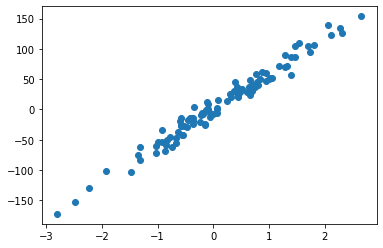

In [7]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x,y)

In [8]:
#check the dimensions of the matrices
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [11]:
#reshape vector y
y = y.reshape(y.shape[0],1)

In [12]:
print(y.shape)

(100, 1)


In [13]:
#matrice X
X = np.hstack((x, np.ones(x.shape)))
X.shape

(100, 2)

In [15]:
theta = np.random.randn(2, 1)
theta.shape

(2, 1)

In [16]:
theta

array([[-0.63113656],
       [ 0.19625045]])

# 2.Model

In [17]:
def model(X, theta):
    return X.dot(theta)

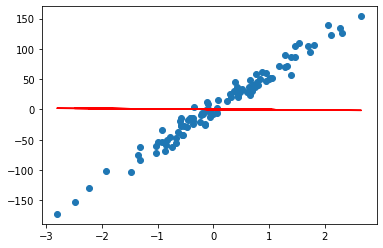

In [22]:
plt.scatter(x,y)
plt.plot(x, model(X, theta), c="red")

# 3.Cost Function

In [26]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta)-y)**2)

In [27]:
cost_function(X, y, theta)

2002.8478112774785

# 4.Gradient ans gradient descent

In [29]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [42]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# 5.Action

In [43]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [38]:
theta_final

array([[58.9559947 ],
       [ 0.88372935]])

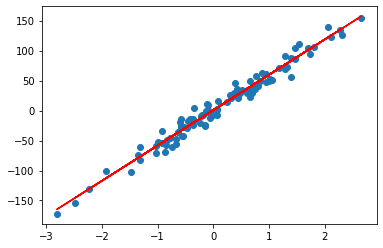

In [39]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c="r")

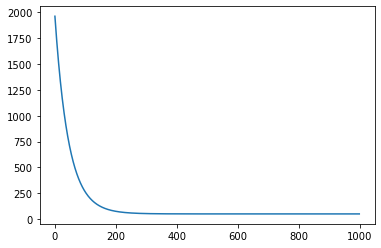

In [44]:
plt.plot(range(1000), cost_history)

In [48]:
def coef_determination(y, pred):
    u = ((y-pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [49]:
coef_determination(y, predictions)

0.9731774143475898